<a href="https://colab.research.google.com/github/bmox/credit-card-approval/blob/main/credit_card_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Questions.txt](https://drive.google.com/file/d/1_32oHsrOuVPZzQGpy5X6Hmw_fhAXzvGw/view?usp=sharing)<br>
[creditcard.csv](https://drive.google.com/file/d/1ZxaThxH4fqtZQxxdgVQcD2dUDULYXLxo/view?usp=sharing)<br>
[readme.pdf](https://drive.google.com/file/d/1_B8mUik9la2596pOZ8dHi__6CD3ikGvu/view?usp=sharing)<br>
[question answers.txt](https://docs.google.com/document/d/11_OxFMj1iACOlG55JXse34KBKVfxmEnpbIBL8a8zl1Q/edit?usp=sharing)

## 1> Who will use / how this prediction will add value
This machine learing model use bank to find coustomer is eligible to get a credit card or not base on previous datasets.


## 2> define +ve case /-ve case(classification)
* +ve case (classification):  The bank will allow user to get credit card.In our dataset +ve case denote as "yes".
* -ve case (classification):  The bank will not allow user to get credit card. In our dataset -ve case denote as "no".



## 3> what metric is appropriate(accuracy,recall,precision,etc)
precision is appropriate because, we want to reduce flase positve(FP).suppose a customer can't afford a credit card but bank give him a  credit card. There is a very very low  chance he will give the money back.It is very dangerous for bank. So we will use precision to find positive identifications was actually correct.


## 4> open the data file in text editor(notepad++,sublime text,
####  what is separator?
In our dataset "," is the separator.  
     
####  any other anomalies?
No, we don't have any anomalies.
     
#### python file handling code may be required to bring file in order?
No, we don't need it

### 6> open file in pandas
import pandas as pd<br>
credit=pd.read_csv('creditcard.csv')

In [ ]:
import pandas as pd
import requests
from io import StringIO
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
from sklearn.metrics import accuracy_score,f1_score
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler

 
orig_url='https://drive.google.com/file/d/1ZxaThxH4fqtZQxxdgVQcD2dUDULYXLxo/view?usp=sharing'
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
credit= pd.read_csv(csv_raw)
 
#credit=pd.read_csv('creditcard.csv')

In [ ]:
credit.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

## 5> header  present ? column names should be short(renaming may be required)
Yes header is present in our dataset. The  headers are -
'card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner','selfemp', 'dependents', 'months', 'majorcards', 'active'

##### we renaming some columns name:
* expenditure as expe
* dependents as depen
* majorcards as major

In [ ]:
print(credit.columns)
print(f"number of rows and columns {credit.shape}")

Index(['card', 'reports', 'age', 'income', 'share', 'expenditure', 'owner',
       'selfemp', 'dependents', 'months', 'majorcards', 'active'],
      dtype='object')
number of rows and columns (1319, 12)


In [ ]:
credit.rename(columns={"expenditure":"expe","dependents":"depen","majorcards":"major"}, inplace = True)
print(credit.columns)

Index(['card', 'reports', 'age', 'income', 'share', 'expe', 'owner', 'selfemp',
       'depen', 'months', 'major', 'active'],
      dtype='object')


## 7) check which column has null(na)(percentage)[IMPORTANT]
No, we don't have any null values.

In [ ]:
null_values=credit.isna().sum()/len(credit)
print(null_values)

card       0.0
reports    0.0
age        0.0
income     0.0
share      0.0
expe       0.0
owner      0.0
selfemp    0.0
depen      0.0
months     0.0
major      0.0
active     0.0
dtype: float64


In [ ]:
credit.head()

,card,reports,age,income,share,expe,owner,selfemp,depen,months,major,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [ ]:
credit.describe()

,reports,age,income,share,expe,depen,months,major,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [ ]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   card     1319 non-null   object 
 1   reports  1319 non-null   int64  
 2   age      1319 non-null   float64
 3   income   1319 non-null   float64
 4   share    1319 non-null   float64
 5   expe     1319 non-null   float64
 6   owner    1319 non-null   object 
 7   selfemp  1319 non-null   object 
 8   depen    1319 non-null   int64  
 9   months   1319 non-null   int64  
 10  major    1319 non-null   int64  
 11  active   1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


## 8) Find your X and y(target)

In [ ]:
x=credit.drop(['card'], axis=1)
y=credit["card"]
print(f"x columns>>>\n{x.columns}")
print(f"y >>>\n{y[:5]}")

x columns>>>
Index(['reports', 'age', 'income', 'share', 'expe', 'owner', 'selfemp',
       'depen', 'months', 'major', 'active'],
      dtype='object')
y >>>
0    yes
1    yes
2    yes
3    yes
4    yes
Name: card, dtype: object


## 9) how many numeric and categorical(string)
    -in all numeric which are discrete / continuous

In [ ]:
numaric_columns=["reports","age","income","share","expe","depen","months","major","active"]
print(f"We have 9 numaric columns >> \n {numaric_columns}")

categorical_columns=["card","owner","selfemp"]
print(f"\nWe have 3 categorical columns >>> \n {categorical_columns}")

discrete_columns=["reports","depen","months","major","active"]
print(f"\nIn all numeric columns we have 5 discrete columns>>>\n{discrete_columns}")
continuous_columns=["age","income","share","expe"]
print(f"\nIn all numeric columns we have 4 continuous columns>>>\n{continuous_columns}")

We have 9 numaric columns >> 
 ['reports', 'age', 'income', 'share', 'expe', 'depen', 'months', 'major', 'active']

We have 3 categorical columns >>> 
 ['card', 'owner', 'selfemp']

In all numeric columns we have 5 discrete columns>>>
['reports', 'depen', 'months', 'major', 'active']

In all numeric columns we have 4 continuous columns>>>
['age', 'income', 'share', 'expe']


In [ ]:
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expe', 'owner', 'selfemp',
       'depen', 'months', 'major', 'active'],
      dtype='object')

##  10)for all categorical , find there labels

In [ ]:
print(credit['owner'].value_counts())
print(credit['selfemp'].value_counts())
print(credit['card'].value_counts())

no     738
yes    581
Name: owner, dtype: int64
no     1228
yes      91
Name: selfemp, dtype: int64
yes    1023
no      296
Name: card, dtype: int64


## 11> in classification : distribution of y


In [ ]:
credit["card"].value_counts()/credit.shape[0]

yes    0.775588
no     0.224412
Name: card, dtype: float64

## 12> are all continuous columns have same scale?
No, all continuous columns have not same scale.

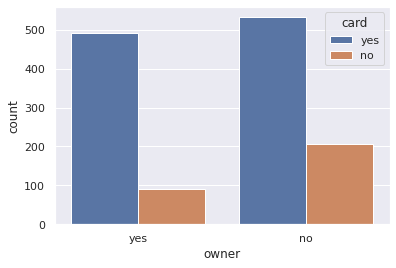

card,no,yes
owner,,
no,0.695946,0.520039
yes,0.304054,0.479961


In [ ]:
sns.set()
sns.countplot(x="owner",hue="card",data=credit)
plt.show()
pd.crosstab(credit["owner"],credit["card"],normalize="columns")

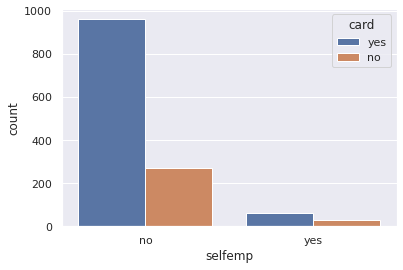

card,no,yes
selfemp,,
no,0.905405,0.938416
yes,0.094595,0.061584


In [ ]:
sns.set()
sns.countplot(x="selfemp",hue="card",data=credit)
plt.show()
pd.crosstab(credit["selfemp"],credit["card"],normalize="columns")

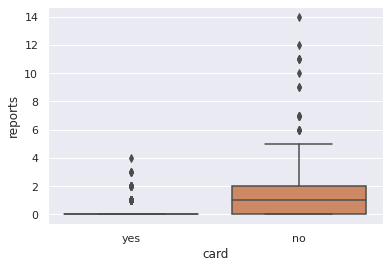

In [ ]:
sns.set()
sns.boxplot(y=credit["reports"],data=credit,x=credit["card"])
plt.show()


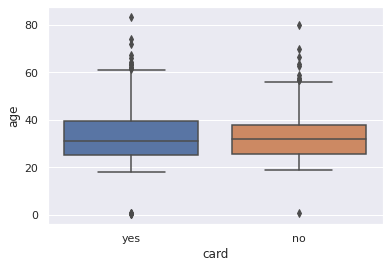

In [ ]:
sns.set()
sns.boxplot(y=credit["age"],data=credit,x=credit["card"])
plt.show()

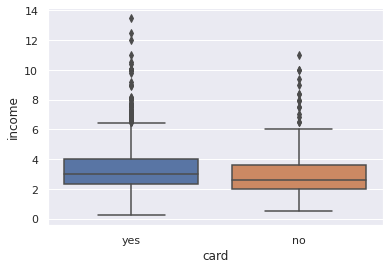

In [ ]:
sns.set()
sns.boxplot(y=credit["income"],data=credit,x=credit["card"])
plt.show()

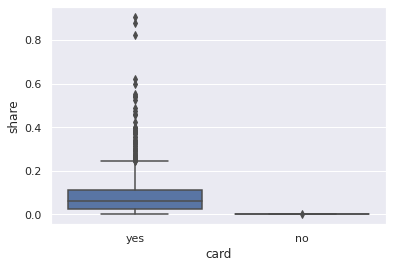

In [ ]:
sns.set()
sns.boxplot(y=credit["share"],data=credit,x=credit["card"])
plt.show()

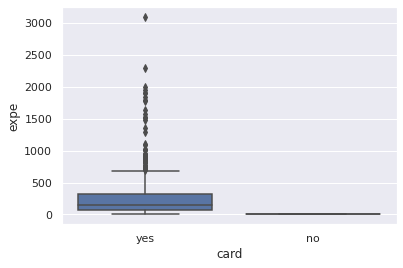

In [ ]:
sns.set()
sns.boxplot(y=credit["expe"],data=credit,x=credit["card"])
plt.show()

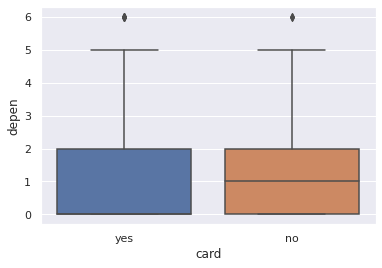

In [ ]:
sns.set()
sns.boxplot(y=credit["depen"],data=credit,x=credit["card"])
plt.show()

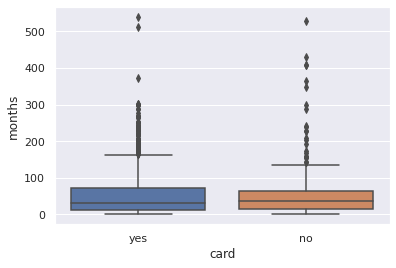

In [ ]:
sns.set()
sns.boxplot(y=credit["months"],data=credit,x=credit["card"])
plt.show()

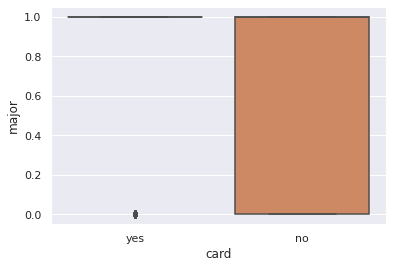

In [ ]:
sns.set()
sns.boxplot(y=credit["major"],data=credit,x=credit["card"])
plt.show()

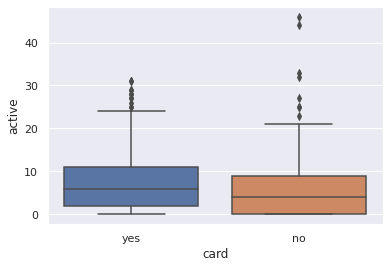

In [ ]:
sns.set()
sns.boxplot(y=credit["active"],data=credit,x=credit["card"])
plt.show()

## replace card unique values with 1 and 0

In [ ]:
cleanup_nums = {"card":{"yes": 1, "no": 0}}
credit.replace(cleanup_nums, inplace=True)
credit["card"].head()

0    1
1    1
2    1
3    1
4    1
Name: card, dtype: int64

## mean encoding

In [ ]:
credit[["card","selfemp","owner"]].head()

,card,selfemp,owner
0,1,no,yes
1,1,no,no
2,1,no,yes
3,1,no,no
4,1,no,yes


In [ ]:
owner_encode=credit.groupby("owner")['card'].mean()
selfemp_encode=credit.groupby("selfemp")['card'].mean()
credit["owner"]=credit["owner"].map(owner_encode)
credit["selfemp"]=credit["selfemp"].map(selfemp_encode)
credit[["card","selfemp","owner"]].head()

,card,selfemp,owner
0,1,0.781759,0.845095
1,1,0.781759,0.720867
2,1,0.781759,0.845095
3,1,0.781759,0.720867
4,1,0.781759,0.845095


In [ ]:
credit["reports"].value_counts()

0     1060
1      137
2       50
3       24
4       17
5       11
7        6
6        5
11       4
9        2
14       1
12       1
10       1
Name: reports, dtype: int64

In [ ]:
x=credit.drop(columns=["card"])
y=credit["card"]


## Analyzing our data

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


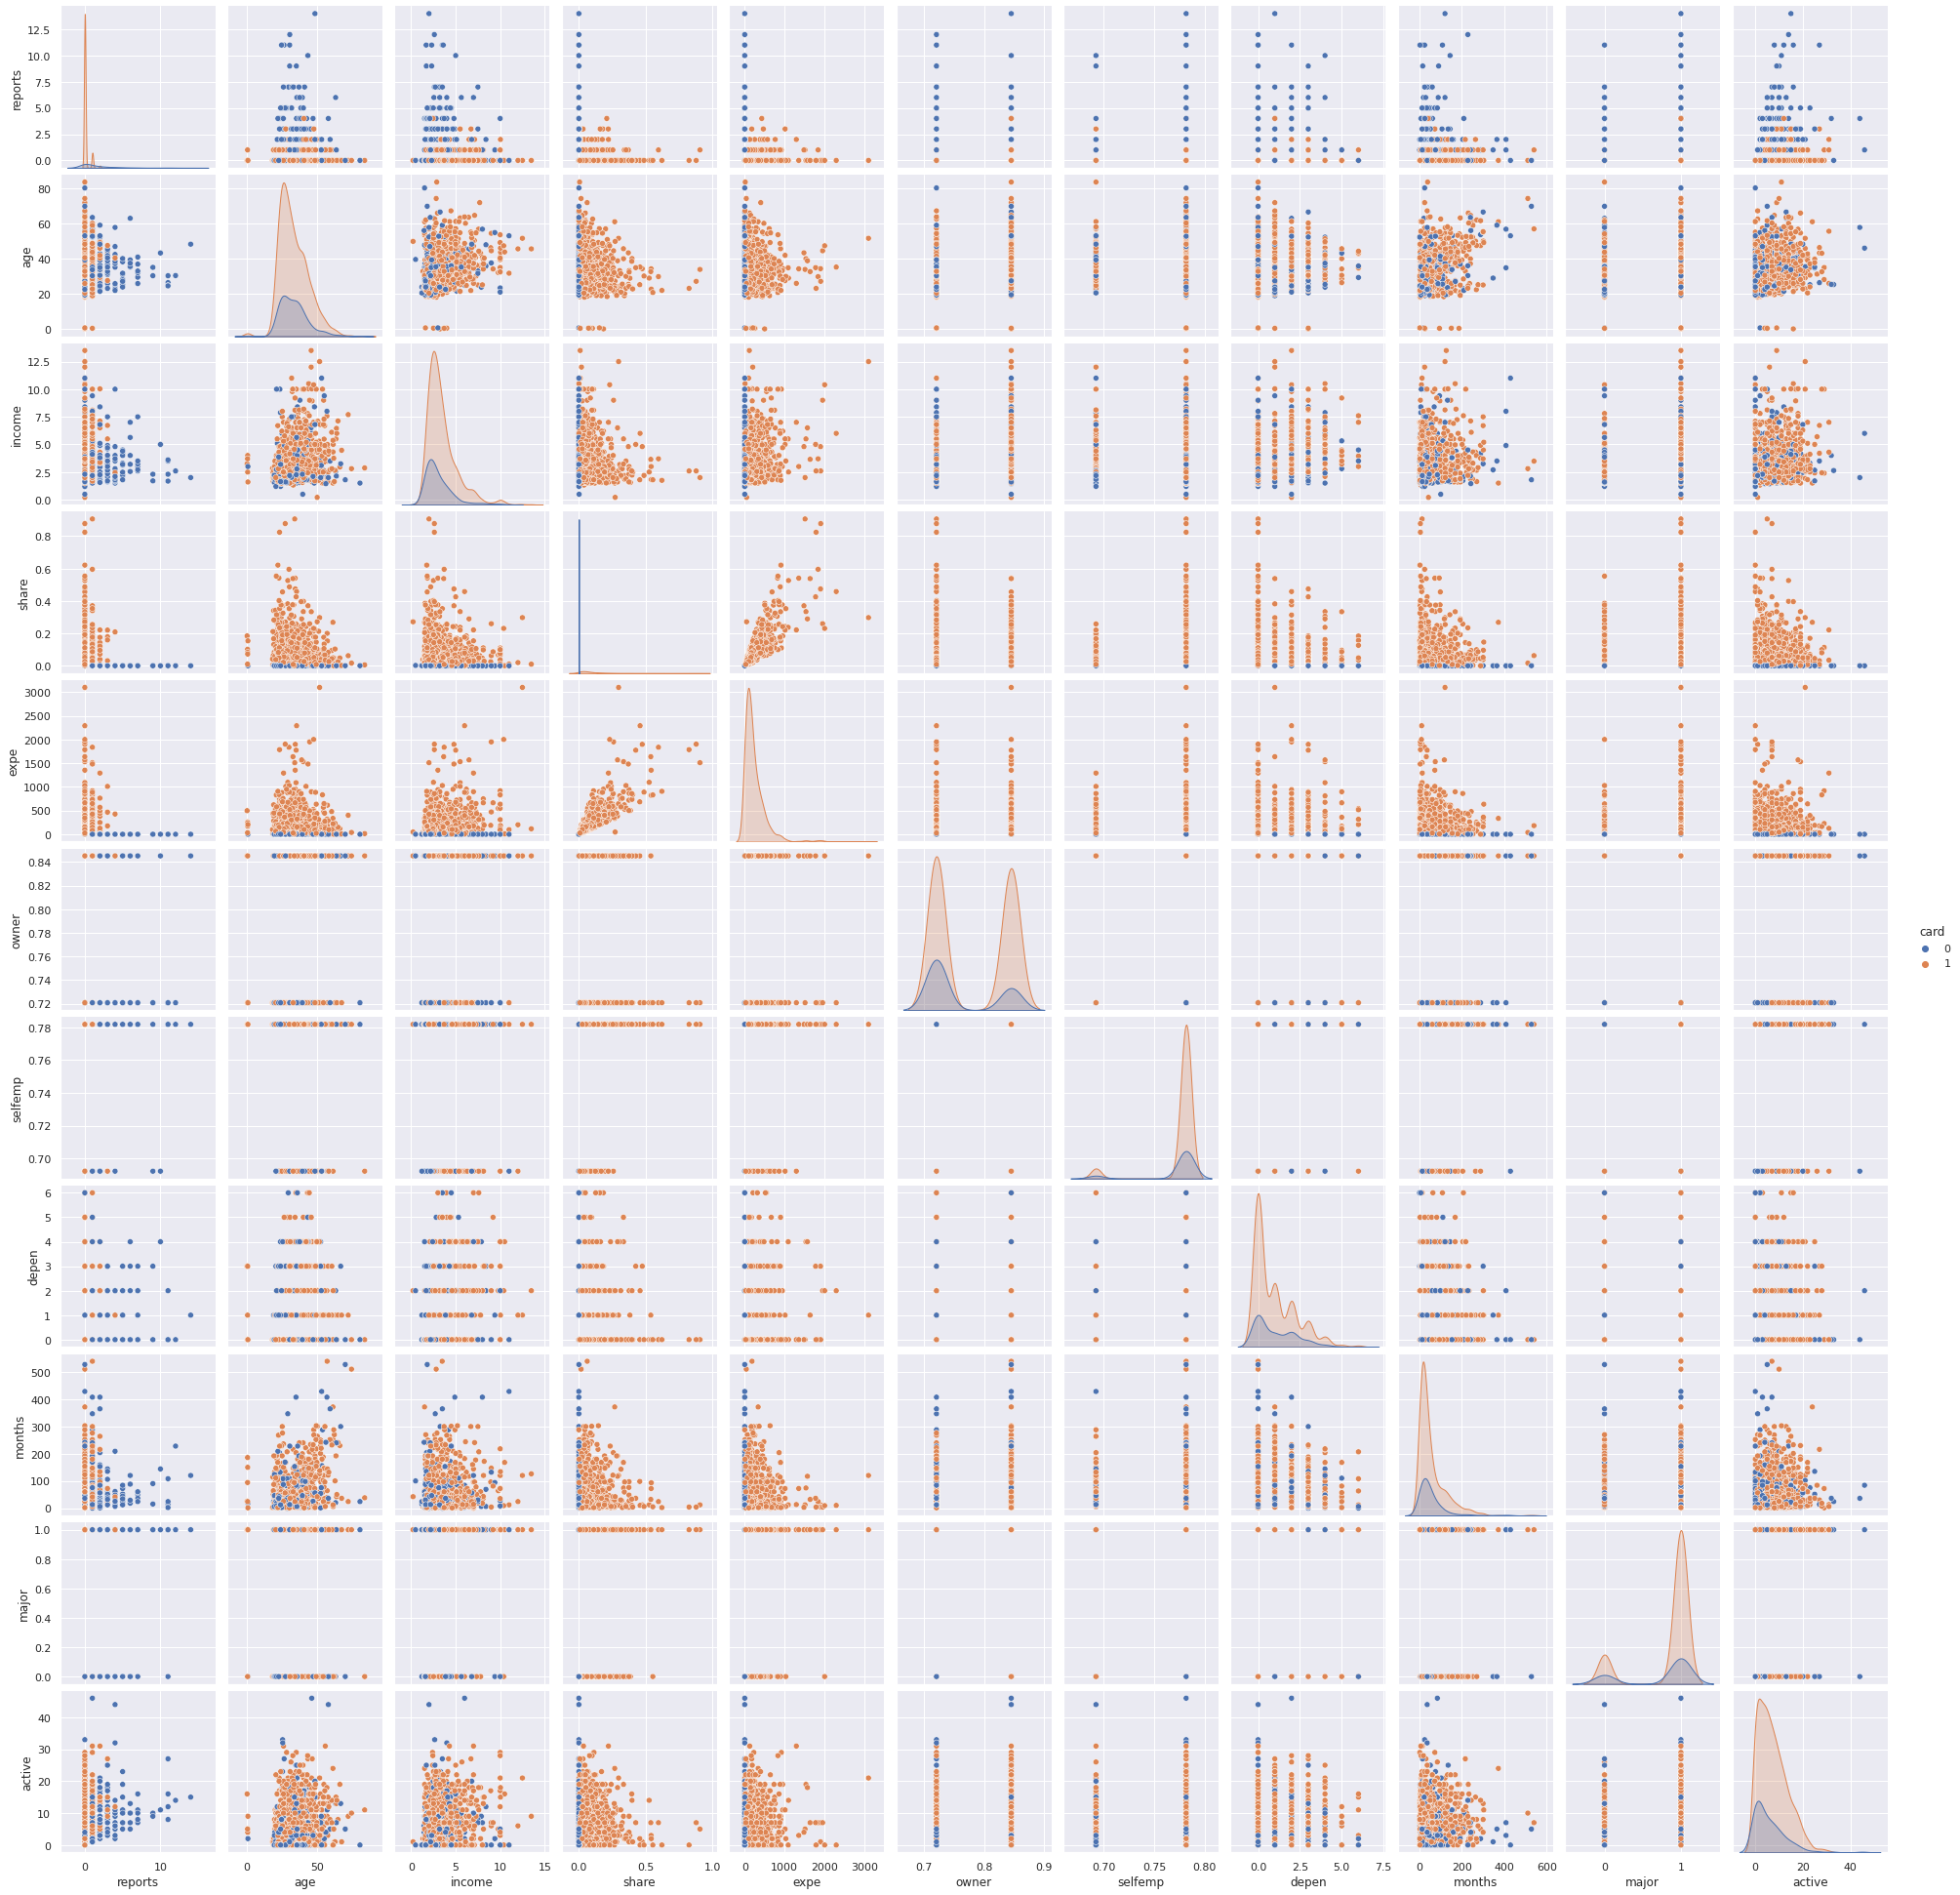

In [ ]:
sns.set()
sns.pairplot(credit,hue='card')
plt.show()

### age

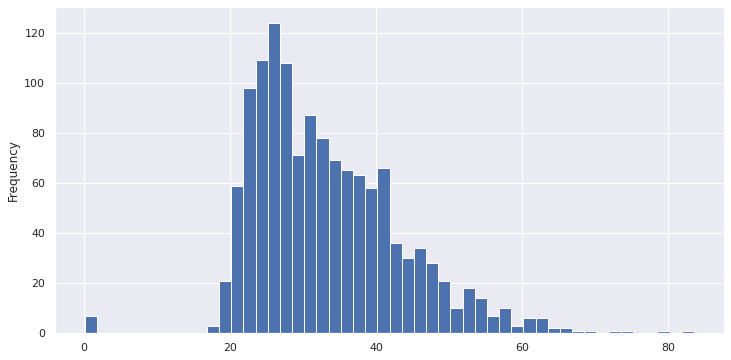

In [ ]:
x["age"].plot(kind="hist",bins=50,figsize=(12,6))

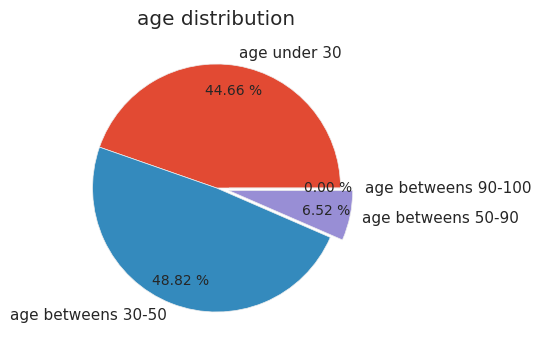

In [ ]:
 
plt.figure(figsize=(4,5), dpi=100) 
plt.style.use('ggplot')
 
young= credit.loc[credit.age < 30].count()[0]
men= credit[(credit.age>= 30) & (credit.age < 50)].count()[0] 
old = credit[(credit.age>= 50) & (credit.age< 90)].count()[0] 
 
oldest= credit[(credit.age>= 90) & (credit.age< 100)].count()[0] 
 
ages = [young,men,old, oldest] 
 
label = ['age under 30', 'age betweens 30-50', 'age betweens 50-90', 'age betweens 90-100' ]
explode = (0,0,0.1,0.1) 
plt.title('age distribution') 
plt.pie(ages, labels=label, explode=explode, pctdistance=0.8,autopct='%.2f %%')
plt.show()

### income

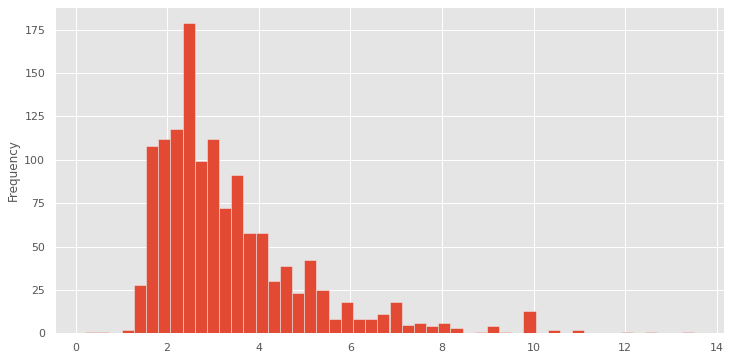

In [ ]:
x["income"].plot(kind="hist",bins=50,figsize=(12,6))

### reports

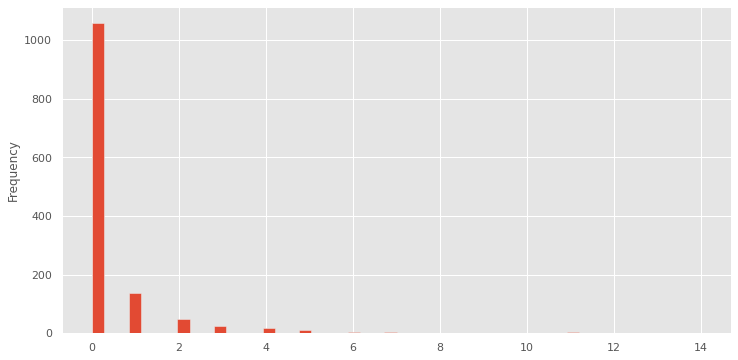

In [ ]:
x["reports"].plot(kind="hist",bins=50,figsize=(12,6))

### expe

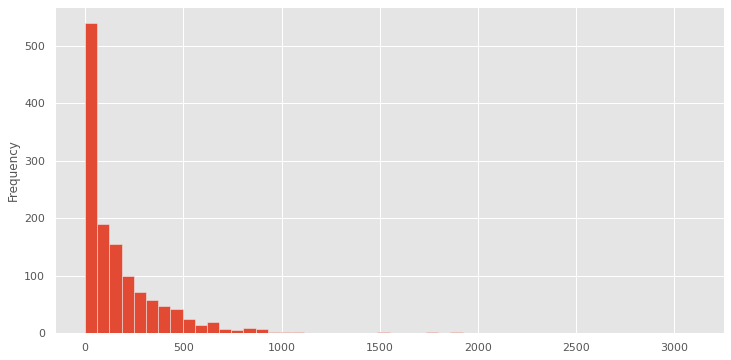

In [ ]:
x["expe"].plot(kind="hist",bins=50,figsize=(12,6))

## share


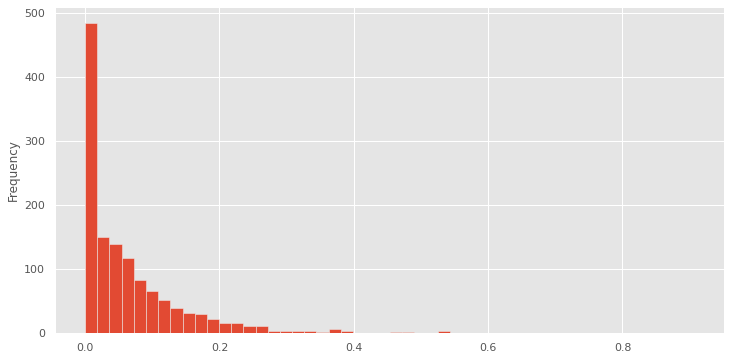

In [ ]:
x["share"].plot(kind="hist",bins=50,figsize=(12,6))

### selfemp

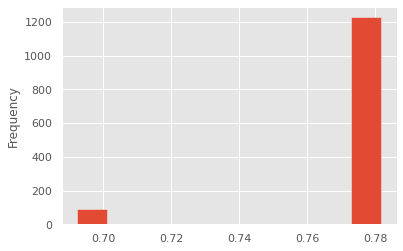

In [ ]:
x["selfemp"].plot(kind="hist")

### card

In [ ]:
credit["card"].describe()

count    1319.000000
mean        0.775588
std         0.417353
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: card, dtype: float64

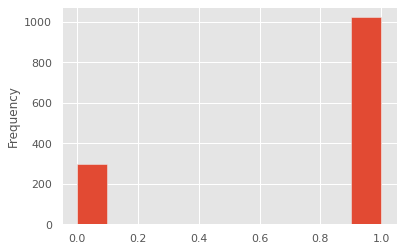

In [ ]:
credit["card"].plot(kind="hist")

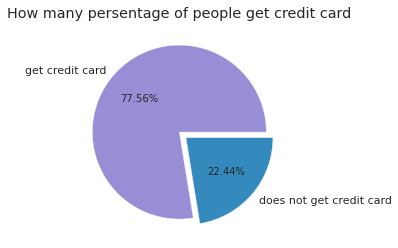

In [ ]:
#plt.style.use('ggplot')
left=credit.loc[credit['card']==1].count()[0]
right=credit.loc[credit['card']==0].count()[0]
Label=["get credit card","does not get credit card"]
color=["#988ed5","#348abd"]
explode=(0,0.1)
plt.pie([left,right],labels=Label,colors=color,autopct='%.2f%%',explode=explode)  #autopct='%.2f' for persantage
plt.title("How many persentage of people get credit card")
plt.show()

## correlation matrix

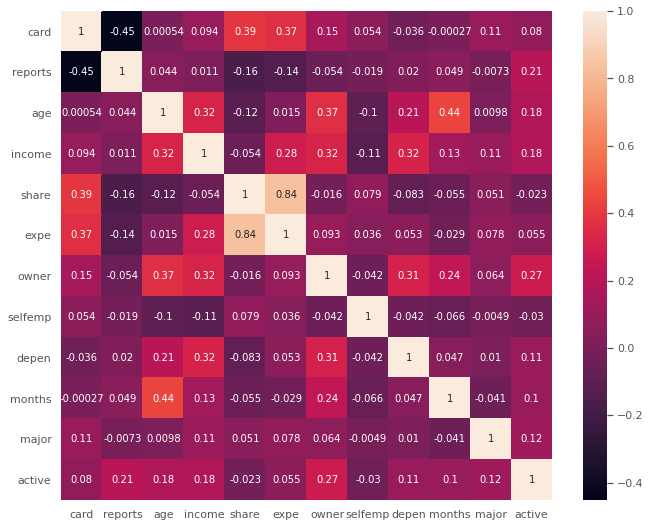

In [ ]:
#get correlations of each features in dataset
corrmat = credit.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(11,9)),
#plot heat map
g=sns.heatmap(credit[top_corr_features].corr(),annot=True)

## creating worst model

In [ ]:
x_worst=credit.drop(columns=["card"])
y_worst=credit["card"]

## Checking we have outliers or not

In [ ]:
credit.mean()

card         0.775588
reports      0.456406
age         33.213103
income       3.365376
share        0.068732
expe       185.057071
owner        0.775588
selfemp      0.775588
depen        0.993935
months      55.267627
major        0.817286
active       6.996967
dtype: float64

In [ ]:
credit.std()

card         0.417353
reports      1.345267
age         10.142783
income       1.693902
share        0.094656
expe       272.218917
owner        0.061696
selfemp      0.022679
depen        1.247745
months      66.271746
major        0.386579
active       6.305812
dtype: float64

In [ ]:
upper_limit=credit.mean()+3*credit.std()
upper_limit

card          2.027647
reports       4.492209
age          63.641453
income        8.447081
share         0.352699
expe       1001.713823
owner         0.960674
selfemp       0.843625
depen         4.737170
months      254.082864
major         1.977022
active       25.914404
dtype: float64

In [ ]:
lower_limit=credit.mean()-3*credit.std()
lower_limit

card        -0.476472
reports     -3.579396
age          2.784754
income      -1.716329
share       -0.215235
expe      -631.599682
owner        0.590501
selfemp      0.707550
depen       -2.749300
months    -143.547610
major       -0.342450
active     -11.920469
dtype: float64

In [ ]:
credit[(credit>upper_limit)|(credit<lower_limit)]

,card,reports,age,income,share,expe,owner,selfemp,depen,months,major,active
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,9.7867,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.692308,NaN,NaN,NaN,NaN


In [ ]:
credit_no_outlier_std_dev=credit[(credit<upper_limit)&(credit>lower_limit)]
credit_no_outlier_std_dev.head()

,card,reports,age,income,share,expe,owner,selfemp,depen,months,major,active
0,1,0.0,37.66667,4.52,0.033270,124.983300,0.845095,0.781759,3.0,54.0,1,12.0
1,1,0.0,33.25000,2.42,0.005217,9.854167,0.720867,0.781759,3.0,34.0,1,13.0
2,1,0.0,33.66667,4.50,0.004156,15.000000,0.845095,0.781759,4.0,58.0,1,5.0
3,1,0.0,30.50000,2.54,0.065214,137.869200,0.720867,0.781759,0.0,25.0,1,7.0
4,1,0.0,32.16667,NaN,0.067051,546.503300,0.845095,0.781759,2.0,64.0,1,5.0


In [ ]:
credit.shape[0]-credit_no_outlier_std_dev.shape[0]

0

In [ ]:
credit_no_outlier_std_dev.shape

(1319, 12)

In [ ]:
credit.shape

(1319, 12)

## So we can see that we don't have any outliers

## MinMaxScaler
m = (x -xmin) / (xmax -xmin)

Where:

* m is our new value
* x is the original cell value
* xmin is the minimum value of the column
* xmax is the maximum value of the column

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(0, 1))
# new_x_train =scaling.fit_transform(x_train)
# new_x_test = scaling.fit_transform(x_test)
new_x = scaling .fit_transform(x_worst)

## Visualise features before 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


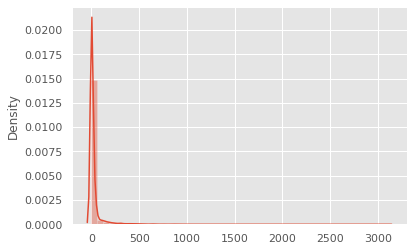

In [ ]:
sns.distplot(x_worst)
plt.show()

## Visualise features after scaler

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


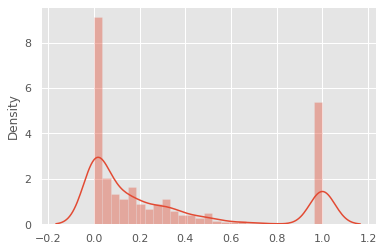

In [ ]:
sns.distplot(new_x)


In [ ]:
#!pip install PrettyTable

# all model are here

In [ ]:
from prettytable import PrettyTable
from sklearn import metrics
def model(x_o,y_o,save_col):
    auc=[]
    pre=[]
    
    accu=[]
    name=[]
    fea=[]
    recall=[]
    f1=[]
    fea.append(save_col)
    store=PrettyTable()
    from sklearn.preprocessing import MinMaxScaler
    scaling = MinMaxScaler(feature_range=(0, 1))
    new_x = scaling .fit_transform(x_o)
    store.field_names = ["model name","auc", "precision","accuracy score","recall","f1_score"]
    scaling = MinMaxScaler(feature_range=(0, 1))
    new_x = scaling .fit_transform(x_o) 
    x_train,x_test,y_train,y_test= train_test_split(new_x,y_o,test_size=0.2,random_state=0)
    #LogisticRegression
    logmodel=LogisticRegression()
    logmodel.fit(x_train,y_train)
    log_predict=logmodel.predict(x_test)
    log_acc=accuracy_score(y_test,log_predict)
    log_pre=precision_score(y_test,log_predict)
    log_rec=recall_score(y_test,log_predict)
    log_auc=metrics.roc_auc_score(y_test,log_predict)
    log_f1=f1_score(y_test,log_predict)
    auc.append(log_auc)
    pre.append(log_pre)
    accu.append(log_acc)
    name.append("LogisticRegression")
    recall.append(log_rec)
    f1.append(log_f1)
    store.add_row(["LogisticRegression", round(log_auc,4), round(log_pre,4),round(log_acc,4),round(log_rec,4),round(log_f1,4)])
    #DecisionTreeClassifier
    dt_model = DecisionTreeClassifier()
    dt_model.fit(x_train,y_train)
    dt_predict=dt_model.predict(x_test)
    dt_acc=accuracy_score(y_test,dt_predict)
    dt_pre=precision_score(y_test,dt_predict)
    dt_rec=recall_score(y_test,dt_predict)
    dt_auc=metrics.roc_auc_score(y_test,dt_predict)
    dt_f1=f1_score(y_test,dt_predict)
    auc.append(dt_auc)
    pre.append(dt_pre)
    accu.append(dt_acc)
    recall.append(dt_rec)
    f1.append(dt_f1)
    name.append("DecisionTreeClassifier")
    store.add_row(["DecisionTreeClassifier",round(dt_auc,4), round(dt_pre,4),round(dt_acc,4),round(dt_rec,4),round(dt_f1,4)])
    #KNeighborsClassifier
    knn_model=neighbors.KNeighborsClassifier(n_neighbors=25,weights="uniform")
    knn_model.fit(x_train,y_train)
    knn_predict=knn_model.predict(x_test)
    knn_acc=accuracy_score(y_test,knn_predict)
    knn_pre=precision_score(y_test,knn_predict)
    knn_rec=recall_score(y_test,knn_predict)
    knn_auc=metrics.roc_auc_score(y_test,knn_predict)
    knn_f1=f1_score(y_test,knn_predict)
    auc.append(knn_auc)
    pre.append(knn_pre)
    accu.append(knn_acc)
    recall.append(knn_rec)
    f1.append(knn_f1)
    name.append("KNeighborsClassifier")
    store.add_row(["KNeighborsClassifier", round(knn_auc,4), round(knn_pre,4),round(knn_acc,4),round(knn_rec,4),round(knn_f1,4)])
    # RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=500)
    rf_model.fit(x_train,y_train)
    rf_predict=rf_model.predict(x_test)
    rf_acc=accuracy_score(y_test,rf_predict)
    rf_pre=precision_score(y_test,rf_predict)
    rf_rec=recall_score(y_test,rf_predict)
    rf_auc=metrics.roc_auc_score(y_test,rf_predict)
    rf_f1=f1_score(y_test,rf_predict)
    auc.append(rf_auc)
    pre.append(rf_pre)
    accu.append(rf_acc)
    name.append("RandomForestClassifier")
    recall.append(rf_rec)
    f1.append(rf_f1)
    store.add_row(["RandomForestClassifier",round (rf_auc,4), round(rf_pre,4),round(rf_auc,4),round(rf_rec,4),round(rf_f1,4)])
    #GaussianNB
    bay_model=GaussianNB()
    bay_model.fit(x_train,y_train)
    bay_predict=bay_model.predict(x_test)
    bay_acc=accuracy_score(y_test,bay_predict)
    bay_pre=precision_score(y_test,bay_predict)
    bay_rec=recall_score(y_test,bay_predict)
    bay_auc=metrics.roc_auc_score(y_test,bay_predict)
    bay_f1=f1_score(y_test,bay_predict)
    auc.append(bay_auc)
    pre.append(bay_pre)
    accu.append(bay_acc)
    name.append("GaussianNB")
    recall.append(bay_rec)
    f1.append(bay_f1)
    store.add_row(["GaussianNB", round(bay_auc,4), round(bay_pre,4),round(bay_acc,4),round(bay_rec,4),round(bay_f1,4)])
    print(store)
    return fea,name,auc,pre,accu,recall,f1
 
print(f"Used features>>> {x_worst.columns}")
column_st=list(x_worst.columns)
t=model(x_worst,y_worst,column_st)

Used features>>> Index(['reports', 'age', 'income', 'share', 'expe', 'owner', 'selfemp',
       'depen', 'months', 'major', 'active'],
      dtype='object')
+------------------------+--------+-----------+----------------+--------+----------+
|       model name       |  auc   | precision | accuracy score | recall | f1_score |
+------------------------+--------+-----------+----------------+--------+----------+
|   LogisticRegression   | 0.6677 |   0.8659  |     0.8712     | 0.9953 |  0.9261  |
| DecisionTreeClassifier | 0.963  |   0.986   |     0.9773     | 0.986  |  0.986   |
|  KNeighborsClassifier  | 0.6507 |   0.8607  |     0.8561     | 0.9813 |  0.917   |
| RandomForestClassifier | 0.9707 |   0.9906  |     0.9707     | 0.9813 |  0.9859  |
|       GaussianNB       | 0.9907 |    1.0    |     0.9848     | 0.9813 |  0.9906  |
+------------------------+--------+-----------+----------------+--------+----------+


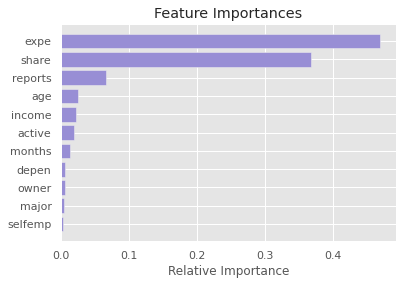

In [ ]:
import numpy as np
#our_fe=credit[['reports', 'active', 'income', 'share', 'expe']]
our_fe=credit[['reports', 'age', 'income', 'share', 'expe', 'owner', 'selfemp',
       'depen', 'months', 'major', 'active']]

our_tar=credit['card']
x_train,x_test,y_train,y_test=train_test_split(our_fe,our_tar,test_size=0.2,random_state=0)
# x_train=our_fe[:1000]
# x_test=our_fe[1000:1319]
# y_train=our_tar[:1000]
# y_test=our_tar[1000:1319]
rf_model = RandomForestClassifier(n_estimators=500)
rf_model.fit(x_train,y_train)
#credit1 = credit.drop(['card'], axis=1)
credit1=credit[['reports', 'age', 'income', 'share', 'expe', 'owner', 'selfemp',
       'depen', 'months', 'major', 'active']]
features =credit1 .columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='#988ed5', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## f_classif

In [ ]:
# from sklearn.feature_selection import f_classif
# from sklearn.feature_selection import SelectKBest
# #for continuous
# c_table=credit[['age', 'income', 'share', 'expe','owner','selfemp']]
# select = SelectKBest(f_classif,k=4)
# select.fit(c_table,y_worst)
# mask = select.get_support()
# count=c_table.columns
# for i in range(len(count)):
#     print(f"{count[i]}:   {mask[i]}")

## chi2

In [ ]:
# from sklearn.feature_selection import chi2
# table=credit[["reports","depen","months","major","active"]]
# select_feature = SelectKBest(chi2, k=5).fit(table, y_worst)
# selected_features_df =                 pd.DataFrame({'Feature':list(table.columns),
#                                      'Scores':select_feature.scores_})
# selected_features_df.sort_values(by='Scores', ascending=False)
 


## reduce some column decision make from chi2 and f_classif and  find  combinations between them and also find auc,precision
 

In [ ]:
#combi=["reports","active","major","income","share","expe","owner"]
combi=["expe","share","reports","age","income","active","months"]
# combinations of all given columns
from itertools import combinations 
comb = combinations(combi, 5) 
data=[]
for i in list(comb): 
    con=list(i)
    print(f"Used features>>> {con}")
    pass_x=credit[con]
    pe=model(pass_x,y_worst,con)
    data.append(pe)

Used features>>> ['expe', 'share', 'reports', 'age', 'income']
+------------------------+--------+-----------+----------------+--------+----------+
|       model name       |  auc   | precision | accuracy score | recall | f1_score |
+------------------------+--------+-----------+----------------+--------+----------+
|   LogisticRegression   |  0.64  |   0.856   |     0.8636     |  1.0   |  0.9224  |
| DecisionTreeClassifier | 0.953  |   0.9814  |     0.9735     | 0.986  |  0.9837  |
|  KNeighborsClassifier  | 0.789  |   0.9152  |     0.8939     | 0.9579 |  0.9361  |
| RandomForestClassifier | 0.9807 |   0.9953  |     0.9807     | 0.9813 |  0.9882  |
|       GaussianNB       | 0.9907 |    1.0    |     0.9848     | 0.9813 |  0.9906  |
+------------------------+--------+-----------+----------------+--------+----------+
Used features>>> ['expe', 'share', 'reports', 'age', 'active']
+------------------------+--------+-----------+----------------+--------+----------+
|       model name      

## find max auc and  max precision from every combinations and store it

In [ ]:
data[0]

([['expe', 'share', 'reports', 'age', 'income']],
 ['LogisticRegression',
  'DecisionTreeClassifier',
  'KNeighborsClassifier',
  'RandomForestClassifier',
  'GaussianNB'],
 [0.64,
  0.9529906542056076,
  0.7889719626168225,
  0.9806542056074766,
  0.9906542056074766],
 [0.856, 0.9813953488372092, 0.9151785714285714, 0.995260663507109, 1.0],
 [0.8636363636363636,
  0.9734848484848485,
  0.8939393939393939,
  0.9810606060606061,
  0.9848484848484849],
 [1.0,
  0.985981308411215,
  0.9579439252336449,
  0.9813084112149533,
  0.9813084112149533],
 [0.9224137931034483,
  0.9836829836829836,
  0.9360730593607306,
  0.988235294117647,
  0.9905660377358491])

In [ ]:
feature_values=[]
max_auc_value=[]
max_auc_model=[]
max_precision_value=[]
max_precision_model=[]
for i in range(len(data)):
    feature_values.append(data[i][0])
    max_auc_value.append(max(data[i][2]))
    loc=data[i][2].index(max(data[i][2]))
    max_auc_model.append(data[i][1][loc])                    
    max_precision_value.append(max(data[i][3]))
    loc1=data[i][3].index(max(data[i][3]))
    max_precision_model.append(data[i][1][loc1])  

## Max auc model

In [ ]:
final_model=max_auc_value.index(max(max_auc_value))
print(f"The highest auc model is>>> {max_auc_model[final_model]}")
lo=data[final_model][1].index(max_auc_model[final_model])
print(f"used features>>> {data[final_model][0][0]}")
print(f"The highest auc model is>>> {data[final_model][1][lo]}")
print(f"AUC>>> {data[final_model][2][lo]}")
print(f"precision>>> {data[final_model][3][lo]}")
print(f"accuracy>>> {data[final_model][4][lo]}")
print(f"recall>>> {data[final_model][5][lo]}")
print(f"f1_score>>>{data[final_model][6][lo]} ")

The highest auc model is>>> GaussianNB
used features>>> ['expe', 'share', 'reports', 'age', 'income']
The highest auc model is>>> GaussianNB
AUC>>> 0.9906542056074766
precision>>> 1.0
accuracy>>> 0.9848484848484849
recall>>> 0.9813084112149533
f1_score>>>0.9905660377358491 


## Max precision model

In [ ]:
final_model1=max_precision_value.index(max(max_precision_value))
print(f"The highest precision model is>>> {max_precision_model[final_model1]}")
lo=data[final_model1][1].index(max_precision_model[final_model1])
print(f"used features>>> {data[final_model1][0][0]}")
print(f"The highest auc model is>>> {data[final_model1][1][lo]}")
print(f"AUC>>> {data[final_model1][2][lo]}")
print(f"precision>>> {data[final_model1][3][lo]}")
print(f"accuracy>>> {data[final_model1][4][lo]}")
print(f"recall>>> {data[final_model1][5][lo]}")
print(f"f1_score>>> {data[final_model1][6][lo]}")  

The highest precision model is>>> GaussianNB
used features>>> ['expe', 'share', 'reports', 'age', 'income']
The highest auc model is>>> GaussianNB
AUC>>> 0.9906542056074766
precision>>> 1.0
accuracy>>> 0.9848484848484849
recall>>> 0.9813084112149533
f1_score>>> 0.9905660377358491


## we find that  GaussianNB give us good AUC and Precision better than other models. SO, for our model  GaussianNB is the best Classifier.
#### It gives:
#### AUC>>> 0.9848484848484849
#### precision>>> 1.0


'reports', 'active', 'income', 'share', 'expe'
 are the important columns from our datasets

## Now we rank them by their importance

## Feature Importances using random forest

In [ ]:
credit.columns

Index(['card', 'reports', 'age', 'income', 'share', 'expe', 'owner', 'selfemp',
       'depen', 'months', 'major', 'active'],
      dtype='object')

### check when we pass these columns what gives other  algo

Used features>>> Index(['expe', 'share', 'reports', 'income', 'age'], dtype='object')
+-------------------------------+--------+-----------+----------------+--------+----------+
|           model name          |  auc   | precision | accuracy score | recall | f1_score |
+-------------------------------+--------+-----------+----------------+--------+----------+
|   LogisticRegression(train)   | 0.6606 |   0.8289  |     0.8417     |  1.0   |  0.9064  |
|    LogisticRegression(test)   |  0.64  |   0.856   |     0.8636     |  1.0   |  0.9224  |
| DecisionTreeClassifier(train) |  1.0   |    1.0    |      1.0       |  1.0   |   1.0    |
|  DecisionTreeClassifier(test) | 0.953  |   0.9814  |     0.9735     | 0.986  |  0.9837  |
|  KNeighborsClassifier(train)  | 0.8163 |   0.9037  |     0.9005     | 0.974  |  0.9375  |
|   KNeighborsClassifier(test)  | 0.789  |   0.9152  |     0.8939     | 0.9579 |  0.9361  |
| RandomForestClassifier(train) |  1.0   |    1.0    |      1.0       |  1.0   |   1.0

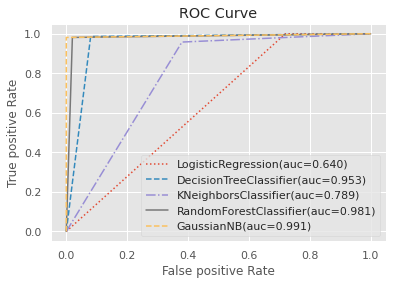

In [ ]:
from sklearn.metrics import roc_curve
def model1(x_o,y_o):
    store=PrettyTable()
    store.field_names = ["model name","auc", "precision","accuracy score","recall","f1_score"]
    scaling = MinMaxScaler(feature_range=(0, 1))
    new_x1 = scaling .fit_transform(x_o) 
    # x_train=new_x1[:1000]
    # x_test=new_x1[1000:1319]
    # y_train=y_o[:1000]
    # y_test=y_o[1000:1319]
    

    x_train,x_test,y_train,y_test=train_test_split(new_x1,y_o,test_size=0.2,random_state=0)
    #LogisticRegression
    logmodel=LogisticRegression()
    logmodel.fit(x_train,y_train)
    log_predict=logmodel.predict(x_test)
    log_acc=accuracy_score(y_test,log_predict)
    log_pre=precision_score(y_test,log_predict)
    log_rec=recall_score(y_test,log_predict)
    log_auc=metrics.roc_auc_score(y_test,log_predict)
    log_f1=f1_score(y_test,log_predict)
    log_predict1=logmodel.predict(x_train)
    log_acc1=accuracy_score(y_train,log_predict1)
    log_pre1=precision_score(y_train,log_predict1)
    log_rec1=recall_score(y_train,log_predict1)
    log_auc1=metrics.roc_auc_score(y_train,log_predict1)
    log_f11=f1_score(y_train,log_predict1)
    store.add_row(["LogisticRegression(train)", round(log_auc1,4), round(log_pre1,4),round(log_acc1,4),round(log_rec1,4),round(log_f11,4)])
    store.add_row(["LogisticRegression(test)", round(log_auc,4), round(log_pre,4),round(log_acc,4),round(log_rec,4),round(log_f1,4)])
    #DecisionTreeClassifier
    dt_model = DecisionTreeClassifier()
    dt_model.fit(x_train,y_train)
    dt_predict=dt_model.predict(x_test)
    dt_acc=accuracy_score(y_test,dt_predict)
    dt_pre=precision_score(y_test,dt_predict)
    dt_rec=recall_score(y_test,dt_predict)
    dt_auc=metrics.roc_auc_score(y_test,dt_predict)
    dt_f1=f1_score(y_test,dt_predict)
    dt_predict1=dt_model.predict(x_train)
    dt_acc1=accuracy_score(y_train,dt_predict1)
    dt_pre1=precision_score(y_train,dt_predict1)
    dt_rec1=recall_score(y_train,dt_predict1)
    dt_auc1=metrics.roc_auc_score(y_train,dt_predict1)
    dt_f11=f1_score(y_train,dt_predict1)
    store.add_row(["DecisionTreeClassifier(train)",round(dt_auc1,4), round(dt_pre1,4),round(dt_acc1,4),round(dt_rec1,4),round(dt_f11,4)])
    store.add_row(["DecisionTreeClassifier(test)",round(dt_auc,4), round(dt_pre,4),round(dt_acc,4),round(dt_rec,4),round(dt_f1,4)])
    #KNeighborsClassifier
    knn_model=neighbors.KNeighborsClassifier(n_neighbors=25,weights="uniform")
    knn_model.fit(x_train,y_train)
    knn_predict=knn_model.predict(x_test)
    knn_acc=accuracy_score(y_test,knn_predict)
    knn_pre=precision_score(y_test,knn_predict)
    knn_rec=recall_score(y_test,knn_predict)
    knn_auc=metrics.roc_auc_score(y_test,knn_predict)
    knn_f1=f1_score(y_test,knn_predict)
    knn_predict1=knn_model.predict(x_train)
    knn_acc1=accuracy_score(y_train,knn_predict1)
    knn_pre1=precision_score(y_train,knn_predict1)
    knn_rec1=recall_score(y_train,knn_predict1)
    knn_auc1=metrics.roc_auc_score(y_train,knn_predict1)
    knn_f11=f1_score(y_train,knn_predict1)
    store.add_row(["KNeighborsClassifier(train)", round(knn_auc1,4), round(knn_pre1,4),round(knn_acc1,4),round(knn_rec1,4),round(knn_f11,4)])
    store.add_row(["KNeighborsClassifier(test)", round(knn_auc,4), round(knn_pre,4),round(knn_acc,4),round(knn_rec,4),round(knn_f1,4)])
    # RandomForestClassifier
    rf_model = RandomForestClassifier(n_estimators=500)
    rf_model.fit(x_train,y_train)
    rf_predict=rf_model.predict(x_test)
    rf_acc=accuracy_score(y_test,rf_predict)
    rf_pre=precision_score(y_test,rf_predict)
    rf_rec=recall_score(y_test,rf_predict)
    rf_auc=metrics.roc_auc_score(y_test,rf_predict)
    rf_f1=f1_score(y_test,rf_predict)
    rf_predict1=rf_model.predict(x_train)
    rf_acc1=accuracy_score(y_train,rf_predict1)
    rf_pre1=precision_score(y_train,rf_predict1)
    rf_rec1=recall_score(y_train,rf_predict1)
    rf_auc1=metrics.roc_auc_score(y_train,rf_predict1)
    rf_f11=f1_score(y_train,rf_predict1)
    store.add_row(["RandomForestClassifier(train)",round (rf_auc1,4), round(rf_pre1,4),round(rf_auc1,4),round(rf_rec1,4),round(rf_f11,4)])
    store.add_row(["RandomForestClassifier(test)",round (rf_auc,4), round(rf_pre,4),round(rf_auc,4),round(rf_rec,4),round(rf_f1,4)])
    #GaussianNB
    bay_model=GaussianNB()
    bay_model.fit(x_train,y_train)
    bay_predict=bay_model.predict(x_test)
    bay_acc=accuracy_score(y_test,bay_predict)
    bay_pre=precision_score(y_test,bay_predict)
    bay_rec=recall_score(y_test,bay_predict)
    bay_auc=metrics.roc_auc_score(y_test,bay_predict)
    bay_f1=f1_score(y_test,bay_predict)
    bay_predict1=bay_model.predict(x_train)
    bay_acc1=accuracy_score(y_train,bay_predict1)
    bay_pre1=precision_score(y_train,bay_predict1)
    bay_rec1=recall_score(y_train,bay_predict1)
    bay_auc1=metrics.roc_auc_score(y_train,bay_predict1)
    bay_f11=f1_score(y_train,bay_predict1)
    store.add_row(["GaussianNB(train)", round(bay_auc1,4), round(bay_pre1,4),round(bay_acc1,4),round(bay_rec1,4),round(bay_f11,4)])
    store.add_row(["GaussianNB(test)", round(bay_auc,4), round(bay_pre,4),round(bay_acc,4),round(bay_rec,4),round(bay_f1,4)])
    print(store)
    log_fpr,log_tpr,_=roc_curve(y_test,log_predict)
    dt_fpr,dt_tpr,_=roc_curve(y_test,dt_predict)
    knn_fpr,knn_tpr,_=roc_curve(y_test,knn_predict)
    rf_fpr,rf_tpr,_=roc_curve(y_test,rf_predict)
    bay_fpr,bay_tpr,_=roc_curve(y_test,bay_predict)
    plt.plot(log_fpr,log_tpr,linestyle=":",label="LogisticRegression(auc=%0.3f)"% log_auc)
    plt.plot(dt_fpr,dt_tpr,linestyle="--",label="DecisionTreeClassifier(auc=%0.3f)"% dt_auc)
    plt.plot(knn_fpr,knn_tpr,linestyle="-.",label="KNeighborsClassifier(auc=%0.3f)"% knn_auc)
    plt.plot( rf_fpr,rf_tpr,linestyle="-",label="RandomForestClassifier(auc=%0.3f)"% rf_auc)
    plt.plot( bay_fpr,bay_tpr,linestyle="--",label="GaussianNB(auc=%0.3f)"% bay_auc)
    plt.title("ROC Curve")
    plt.xlabel("False positive Rate")
    plt.ylabel("True positive Rate")
    plt.legend()
    plt.show()
        
 
 
 
 
best_features=credit[['expe', 'share', 'reports', 'income',"age"]]
print(f"Used features>>> {best_features.columns}")
model1(best_features,y_worst)